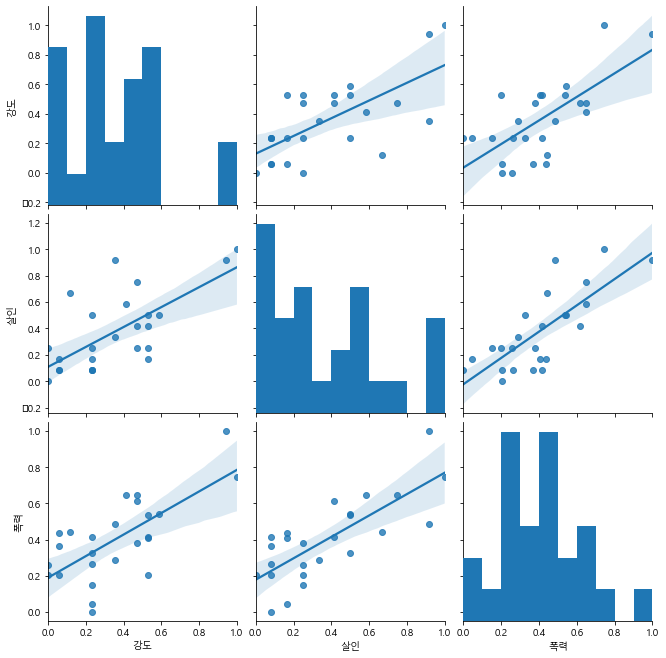

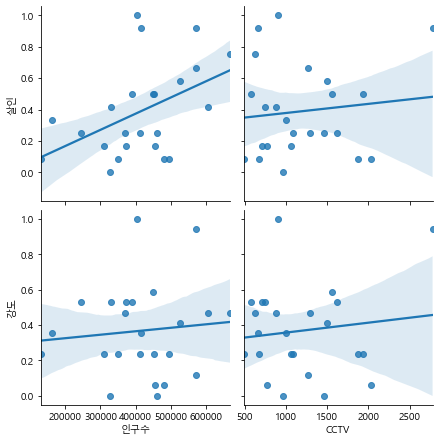

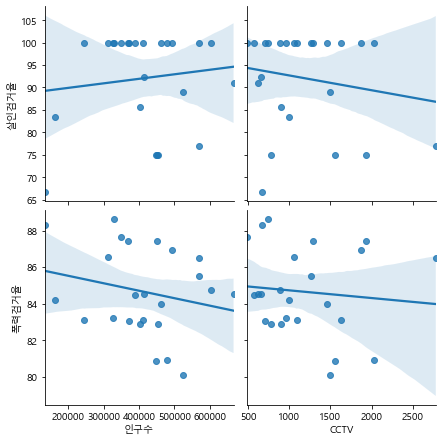

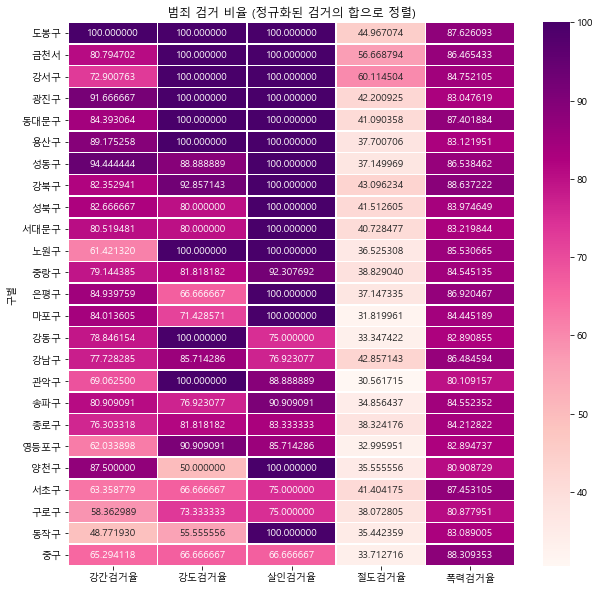

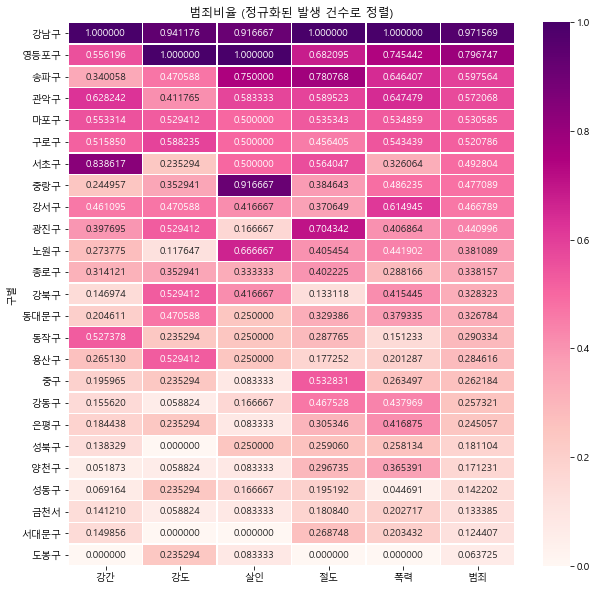

In [59]:
import pandas as pd
import numpy as np
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv', encoding='utf-8')
crime_anal_raw.head()
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv', encoding='utf-8', index_col=0)
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal.head()

crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] =100

crime_anal.head()

crime_anal.rename(columns = {'강간 발생':'강간',
                            '강도 발생': '강도',
                            '살인 발생': '살인',
                            '절도 발생' : '절도',
                            '폭력 발생': '폭력'}, inplace=True)
crime_anal.head()

from sklearn import preprocessing

col =['강간','강도','살인','절도','폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

result_CCTV = pd.read_csv('data/01. CCTV_result.csv', encoding='utf-8', index_col='구별')
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm

col=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] =np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

sns.pairplot(crime_anal_norm, vars=["강도","살인","폭력"], kind='reg', size=3)
plt.show()

sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"], y_vars=["살인","강도"], kind = 'reg', size=3)
plt.show()

sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"], y_vars=["살인검거율","폭력검거율"], kind = 'reg', size=3)
plt.show()

tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] /tmp_max *100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize= (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot= True, fmt ='f', linewidths=.5, cmap = 'RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

target_col = ['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄',ascending=False)
plt.figure(figsize =(10,10))

sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap = 'RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

crime_anal_norm.to_csv('data/02. crime_in_Seoul_final.csv', sep=',', encoding ='utf-8')



In [65]:
import folium
import pandas as pd

map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

stamen = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
stamen

stamen = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', zoom_start=13)
stamen

map_2 = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', zoom_start=13)
folium.Marker([45.5244, -122.6699], popup='The Waterfront').add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], radius=50, popup= 'Laurehurst Park', color ='#3186cc', fill_color ='#3186cc', ).add_to(map_2)

map_2

state_unemployment = 'data/02. folium_US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)
state_data.head()

state_geo = 'data/02. folium_us-states.json'

map = folium.Map(location=[40,-98], zoom_start=4)
map.choropleth(geo_data = state_geo, data=state_data,columns=['State', 'Unemployment'], key_on='feature.id', fill_color='YlGn', legend_name='Unemployment Rate (%)')
map